# Import Useful Libraries and Data

In [113]:
# For handling the data
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

# For presentation
import warnings
warnings.filterwarnings("ignore")

# For Model Development
from sklearn.feature_selection import SelectFromModel
#from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# For Model Evaluation
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
train_df = pd.read_csv('data/train_dataset.csv')
x_test_df = pd.read_csv('data/x_test.csv')
y_test_df = pd.read_csv('data/y_test.csv')

# Exploratory Data Analysis

**Display the first 5 rows of each dataset**

In [3]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
x_test_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [5]:
y_test_df.head()

,id,site_eui
0,75757,166.588554
1,75758,259.381565
2,75759,158.537090
3,75760,261.441520
4,75761,242.967711


**Display basic information of each dataset**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
train_df.isnull().sum().sort_values(ascending=False).head(10)

days_with_fog                45796
direction_peak_wind_speed    41811
max_wind_speed               41082
direction_max_wind_speed     41082
energy_star_rating           26709
year_built                    1837
Year_Factor                      0
november_max_temp                0
cooling_degree_days              0
december_max_temp                0
dtype: int64

In [8]:
x_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [9]:
x_test_df.isnull().sum().sort_values(ascending=False).head(10)

days_with_fog                9117
max_wind_speed               8575
direction_peak_wind_speed    8575
direction_max_wind_speed     8575
energy_star_rating           2254
year_built                     92
Year_Factor                     0
november_max_temp               0
cooling_degree_days             0
december_max_temp               0
dtype: int64

In [10]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9705 non-null   int64  
 1   site_eui  9705 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.8 KB


The following are observed: 

Train Dataset
1. The dataset has 75756 rows ans 64 columns
2. Dataset has 61 numeric and 3 object columns
3. Numeric columns are consist of both integer and float data type
4. There are 6 columns that have null values: days_with_fog, direction_peak_wind_speed, max_wind_speed, direction_max_wind_speed, energy_star_rating and year_built

x_test Dataset
1. The dataset has 9705 rows and 63 columns
2. Dataset has 60 numeric and 3 object columns
3. Numeric columns are consist of both integer and float data type
4. There are 6 columns that have null values: days_with_fog, direction_peak_wind_speed, max_wind_speed, direction_max_wind_speed, energy_star_rating and year_built (similar to the train dataset)

y_test Dataset
1. The dataset has 9075 rows and 2 columns
2. The dataset has the same number of rows to the x_test dataset
3. Columns are id and site_eui which are both numeric values.
4. The column site_eui is the target value
5. There are no missing values in the dataset.

**Check the unique values of each dataset**

In [11]:
for col in train_df:
    print("---**"+col+"**---")
    print(train_df[col].unique())

---**Year_Factor**---
[1 2 3 4 5 6]
---**State_Factor**---
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
---**building_class**---
['Commercial' 'Residential']
---**facility_type**---
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_servi

**Check for the descriptive statistics of the data**

In [12]:
train_df.describe(include='all')

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,75757,75757,75757,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
unique,NaN,7,2,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,State_6,Residential,Multifamily_Uncategorized,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,50840,43558,39455,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.367755,NaN,NaN,NaN,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,NaN,NaN,NaN,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,NaN,NaN,NaN,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,NaN,NaN,NaN,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,NaN,NaN,NaN,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,NaN,NaN,NaN,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000


In [13]:
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [14]:
x_test_df.describe(include='all')

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9705,9705,9705,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
unique,NaN,6,2,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,State_11,Commercial,Multifamily_Uncategorized,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3268,5607,2199,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.0,NaN,NaN,NaN,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,NaN,NaN,NaN,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,NaN,NaN,NaN,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,NaN,NaN,NaN,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,NaN,NaN,NaN,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,NaN,NaN,NaN,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000


In [15]:
x_test_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [16]:
y_test_df.describe()

,id,site_eui
count,9705.000000,9705.000000
mean,80609.000000,71.294284
std,2801.736515,60.133602
min,75757.000000,-0.136703
25%,78183.000000,36.751719
50%,80609.000000,60.029687
75%,83035.000000,84.619743
max,85461.000000,892.420387


**Combine the dataset for data visualization**

In [17]:
test_df = x_test_df.copy()

In [18]:
test_df['site_eui'] = y_test_df['site_eui']
test_df['dataset'] = 'test'
train_df['dataset'] = 'train'

df_all = pd.concat([train_df, test_df], axis=0, ignore_index=True)
df_all

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,dataset
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.50000,...,0,0,0,1.0,1.0,1.0,NaN,248.682615,0,train
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.50000,...,0,0,0,1.0,NaN,1.0,12.0,26.500150,1,train
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.50000,...,0,0,0,1.0,NaN,1.0,12.0,24.693619,2,train
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.50000,...,0,0,0,1.0,NaN,1.0,12.0,48.406926,3,train
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.50000,...,0,0,0,1.0,1.0,1.0,NaN,3.899395,4,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7,State_11,Residential,5plus_Unit_Building,305925.0,2013.0,99.0,812.0,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,23.677329,85457,test
85458,7,State_11,Residential,5plus_Unit_Building,34909.0,1910.0,94.0,26.5,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,20.512284,85458,test
85459,7,State_11,Residential,5plus_Unit_Building,42393.0,2014.0,94.0,812.0,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,39.285975,85459,test
85460,7,State_11,Residential,5plus_Unit_Building,25368.0,1992.0,79.0,812.0,21,38.66129,...,3,0,0,NaN,NaN,NaN,NaN,29.529438,85460,test


**Compare train and test data**

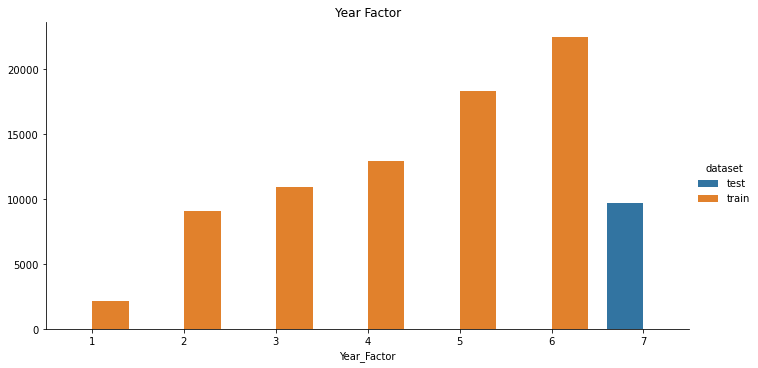

In [19]:
ax = sns.catplot(x='Year_Factor',y='id', data=df_all.groupby(['dataset','Year_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 kind='bar',
                 aspect=2,
                 height=5)\
.set(title="Year Factor",
     ylabel=None)

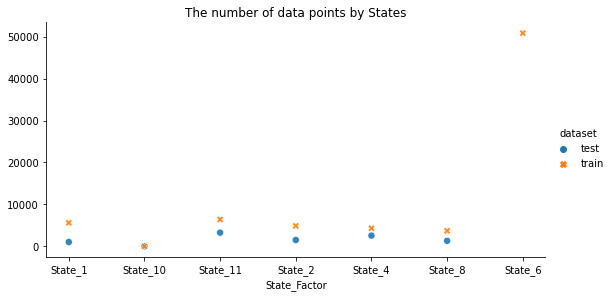

In [20]:
ax = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by States",
    ylabel=None)

> State 6 data is not present in testing dataset <br>
> Only year factor 7 is present in testing dataset, but it is not present in training dataset

**Univariate Analysis**

Text(0.5, 0.98, 'Distribution of Site EUI')

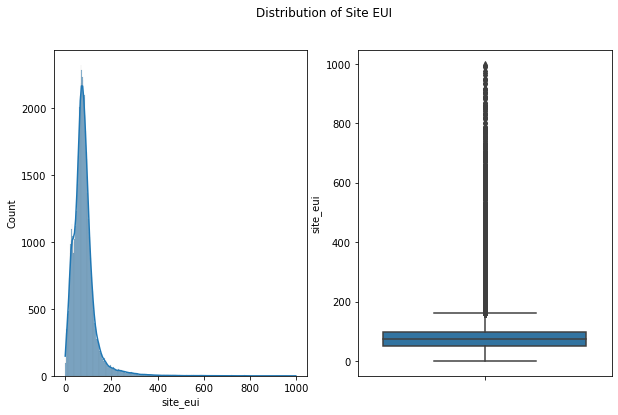

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df_all, kde=True, x='site_eui')
plt.subplot(1,2,2)
sns.boxplot(data=df_all, y='site_eui')
plt.suptitle('Distribution of Site EUI')

> The target variable is skewed to the right. In training data, most of energy intensity falls between the range 80 to 90.

Text(0.5, 1.0, 'State Frequency')

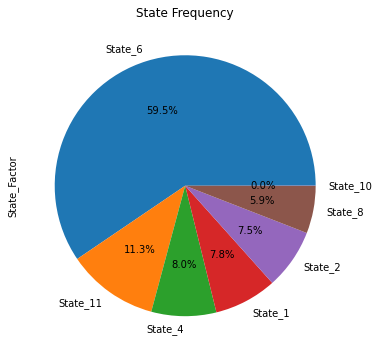

In [22]:
plt.figure(figsize=(18,6))
df_all['State_Factor'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("State Frequency")

> State 6 is the most frequent state in the dataset

**Bivariate Analysis**

**Compare Targert vs the Categorical Columns**

Text(0.5, 0.98, 'State Factor vs Site EUI')

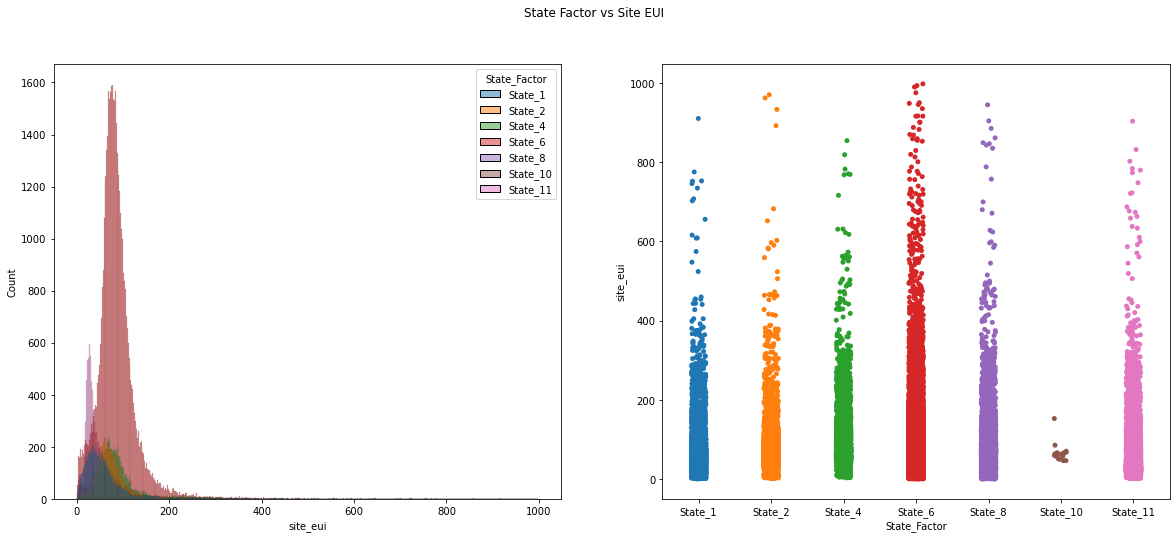

In [23]:
# Site EUI vs State Factor
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(data=df_all, x='site_eui', hue='State_Factor')
plt.subplot(1,2,2)
sns.stripplot(data=df_all, y='site_eui', x='State_Factor')
plt.suptitle('State Factor vs Site EUI')

> The largest at least energy site usage are state 6 and 10, respectively

[Text(0.5, 1.0, 'Site EUI vs building class')]

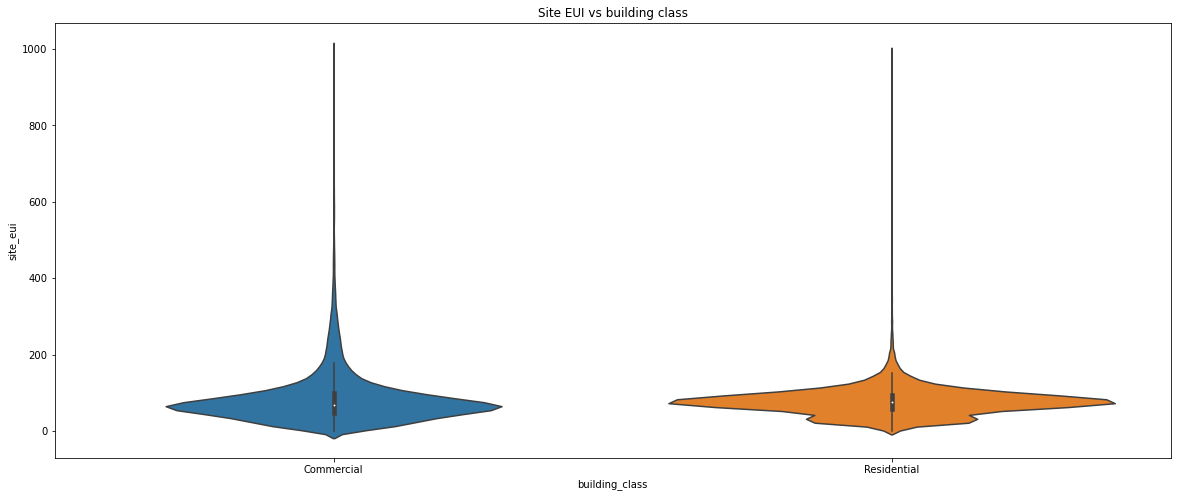

In [24]:
# Site EUI vs Building Class 
plt.figure(figsize=(20,8))
sns.violinplot(data=df_all, y='site_eui', x='building_class').set(title='Site EUI vs building class')

> Residential has the highest number of building class in the dataset. But in term of site eui, commercial has the highest energy usage (around 500)

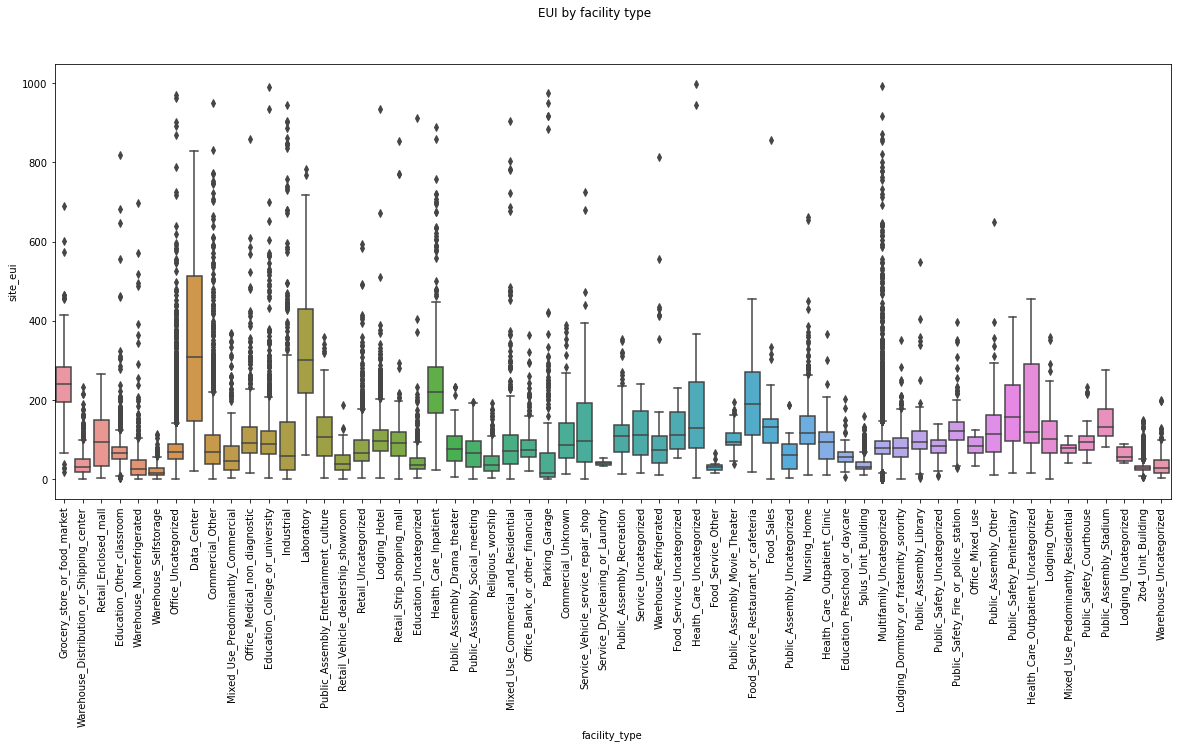

In [25]:
# Site vs Facility type
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df_all, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

**Compare Numerical values vs target variable**

[Text(0.5, 1.0, 'Site EUI vs Year Factor')]

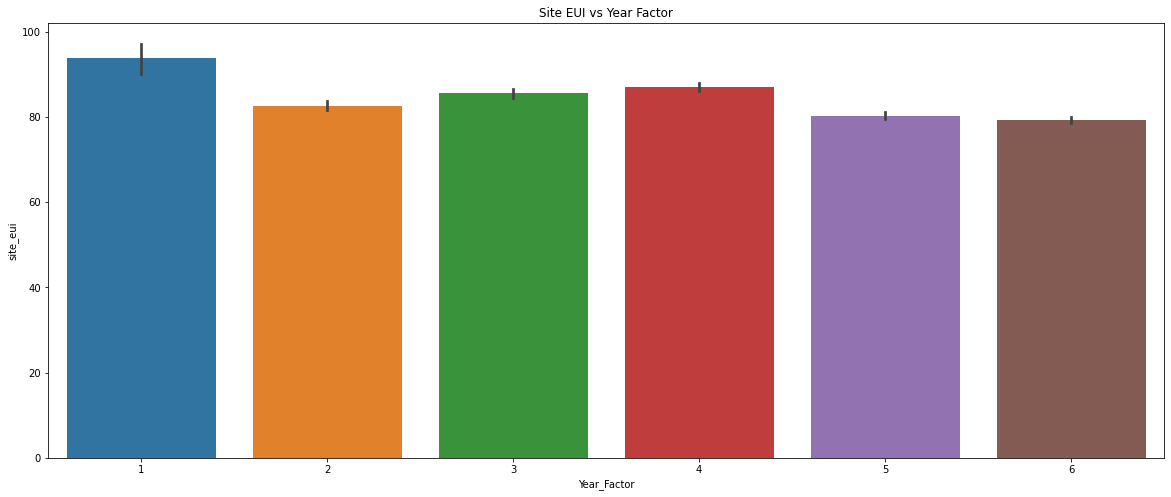

In [26]:
# Year Factor vs Site EUI
plt.figure(figsize=(20,8))
sns.barplot(data=train_df, y='site_eui', x='Year_Factor').set(title='Site EUI vs Year Factor')

* Training data consists of 6 year factor while test data only consists year factor 7. 
* Year factor 1 has the greatest value of site_eui 

Text(0.5, 1.0, 'Site EUI vs Energy Star Rating')

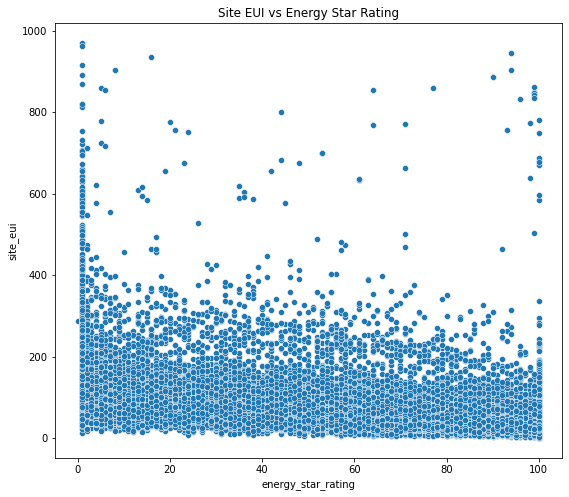

In [27]:
#Energy_star_rating vs site_eui
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=df_all, y='site_eui', x='energy_star_rating')
plt.title('Site EUI vs Energy Star Rating')

Text(0.5, 1.0, 'Average Site EUI vs Energy Star Rating')

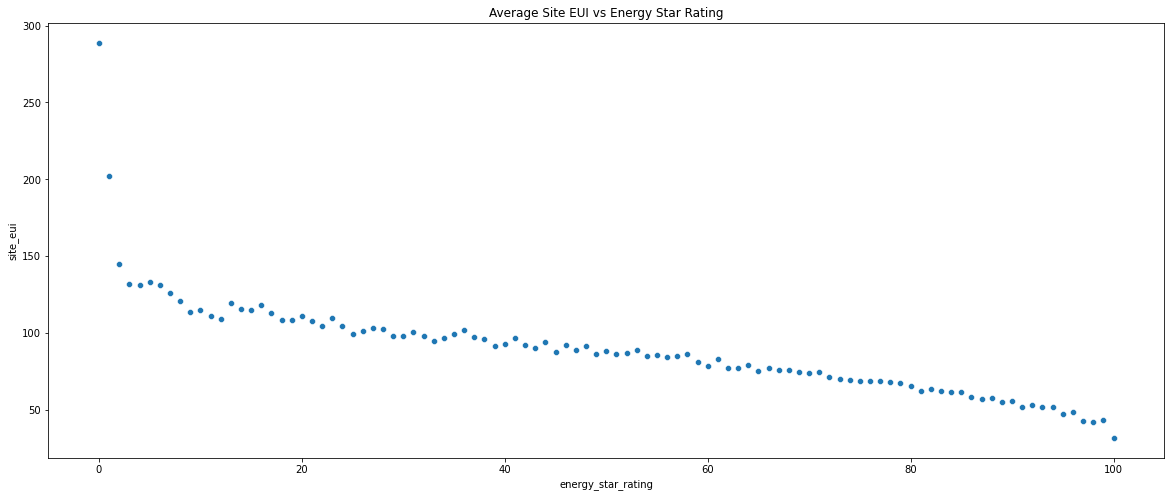

In [28]:
mean = df_all.groupby("energy_star_rating")["site_eui"].agg('mean').reset_index()

plt.figure(figsize=(20,8))
sns.scatterplot(data=mean, y='site_eui', x='energy_star_rating')
plt.title('Average Site EUI vs Energy Star Rating')

* Energy star rating is high if the site have low eui

Text(0.5, 1.0, 'Site EUI vs Elevation')

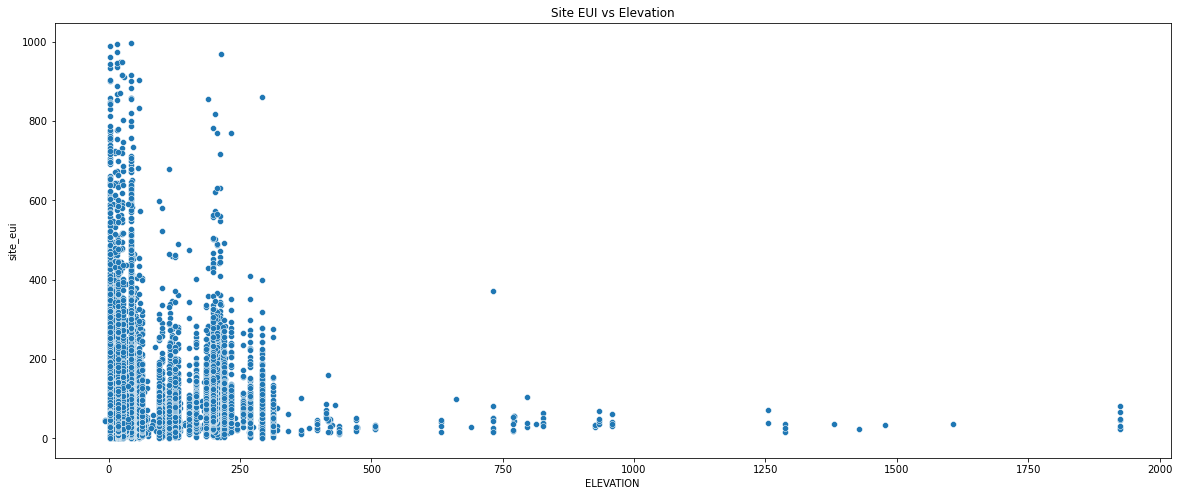

In [29]:
#Elevation vs site_eui
plt.figure(figsize=(20,8))
sns.scatterplot(data=train_df, y='site_eui', x='ELEVATION')
plt.title('Site EUI vs Elevation')

* The lower the elevation of a building, the higher its site eui value

Text(0.5, 1.0, 'Site EUI vs Floor Area')

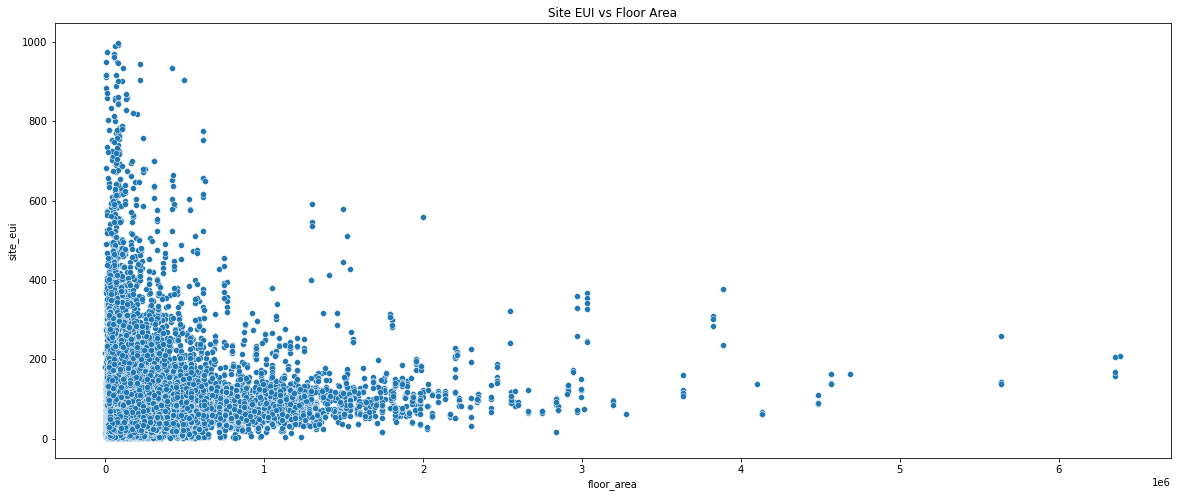

In [30]:
# floor_area vs site eui
plt.figure(figsize=(20,8)) 
sns.scatterplot(data=train_df, y='site_eui', x='floor_area')
plt.title('Site EUI vs Floor Area')

* The lower the floor area of the building, the higher the site eui 

In [31]:
min(df_all['year_built'].values)

0.0

* The lowest year value in the dataset is zero, it should be removed later since it is impossible to have a recorded zero year

Text(0.5, 1.0, 'Site EUI vs Year Built')

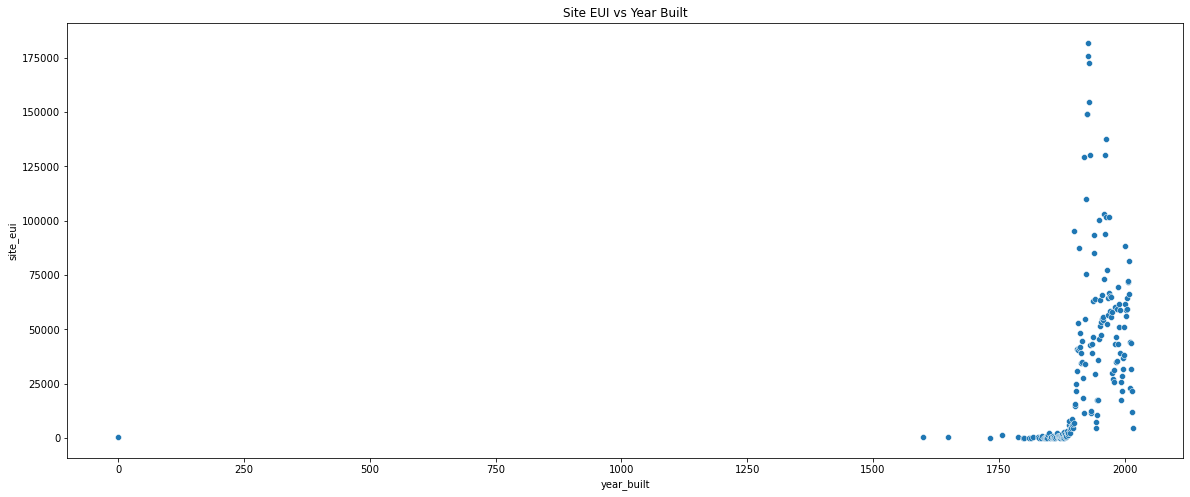

In [32]:
# year_built and site_eui
sum_val = df_all.groupby("year_built")["site_eui"].agg('sum').reset_index()

plt.figure(figsize=(20,8))
sns.scatterplot(data=sum_val, x='year_built', y='site_eui')
plt.title('Site EUI vs Year Built')

Text(0.5, 1.0, 'Site EUI vs Year Built')

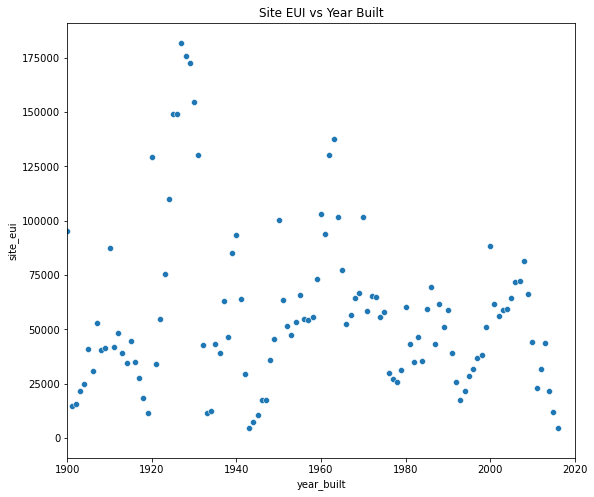

In [33]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=sum_val, x='year_built', y='site_eui')
plt.xlim(1900,2020)
plt.title('Site EUI vs Year Built')

* Site eui of buildings are lower during the 21st century as compared to the previous century

Text(0.5, 1.0, 'Site EUI vs Average Temperature')

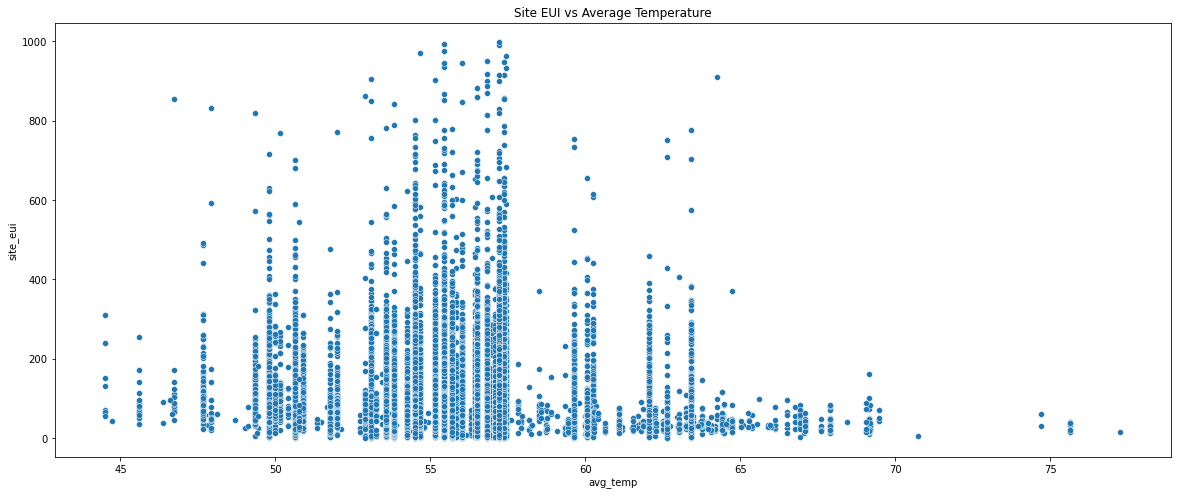

In [34]:
#average temperature and site_eui
plt.figure(figsize=(20,8))
sns.scatterplot(data=train_df, y='site_eui', x='avg_temp')
plt.title('Site EUI vs Average Temperature')

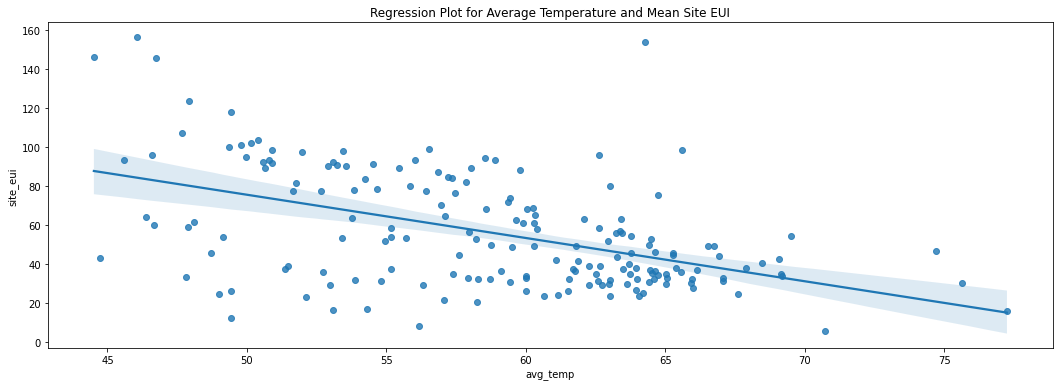

In [35]:
plt.figure(figsize=(18, 6))
df = pd.DataFrame(df_all.groupby('avg_temp')['site_eui'].agg('mean')).reset_index()
sns.regplot(data=df, x='avg_temp', y='site_eui')
plt.title('Regression Plot for Average Temperature and Mean Site EUI')
plt.show()

* The higher the average temperature value, the lower the site_eui value

In [36]:
degree_days = df_all.groupby('State_Factor').agg({'cooling_degree_days': 'mean', 
                                              'heating_degree_days': 'mean', 
                                              'site_eui': 'mean'}).reset_index()

Text(0.5, 1.0, 'Site EUI vs Cooling Degree Days')

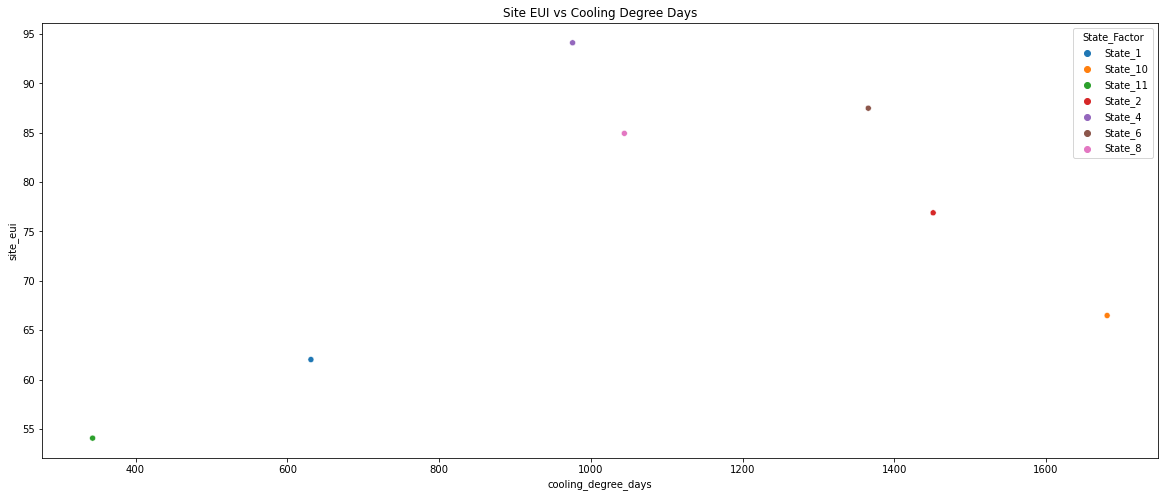

In [37]:
#cooling/heating degree vs site_eui
plt.figure(figsize=(20,8))
sns.scatterplot(data=degree_days, y='site_eui', x='cooling_degree_days', hue='State_Factor')
plt.title('Site EUI vs Cooling Degree Days')

* State 11 has the lowest state eui for both cooling and heating degree days

In [38]:
rating_site_eui = df_all.groupby('State_Factor').agg({'energy_star_rating': 'mean', 
                                              'site_eui': 'mean'}).reset_index()

Text(0.5, 1.0, 'Site EUI vs Heating Days')

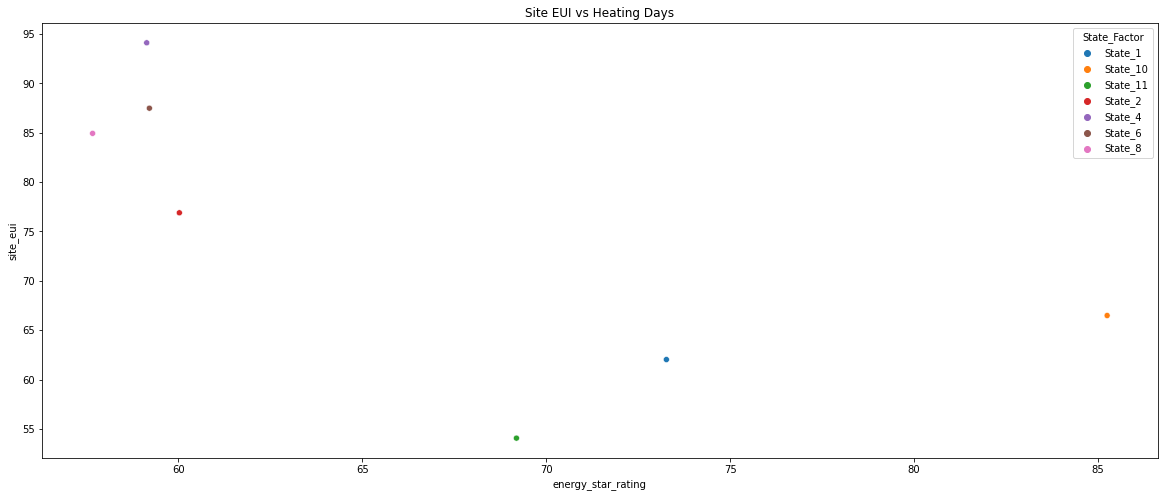

In [39]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=rating_site_eui, y='site_eui', x='energy_star_rating', hue='State_Factor')
plt.title('Site EUI vs Heating Days')

* Even though state 4 has the highest site_eui value, it does not have the highest energy start rating
* State 10 has the highest energy start rating among the US states

**Multivariate Analysis**

In [40]:
# List all numeric attributes
num_values = list(df_all.select_dtypes(include=[np.number]).columns)

In [41]:
def plot_corr(df,figsize):
    # Create the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle 
    mask = np.triu(np.ones_like(corr, dtype=bool))


    # Add the mask to the heatmap
    plt.figure(figsize=(figsize))
    sns.set(font_scale=1)
    sns.heatmap(corr, mask=mask, cmap = sns.color_palette("Spectral"), center=0, linewidths=1, fmt=".2f", annot=True)

    plt.title('Correlation between numerical features')
    plt.show()

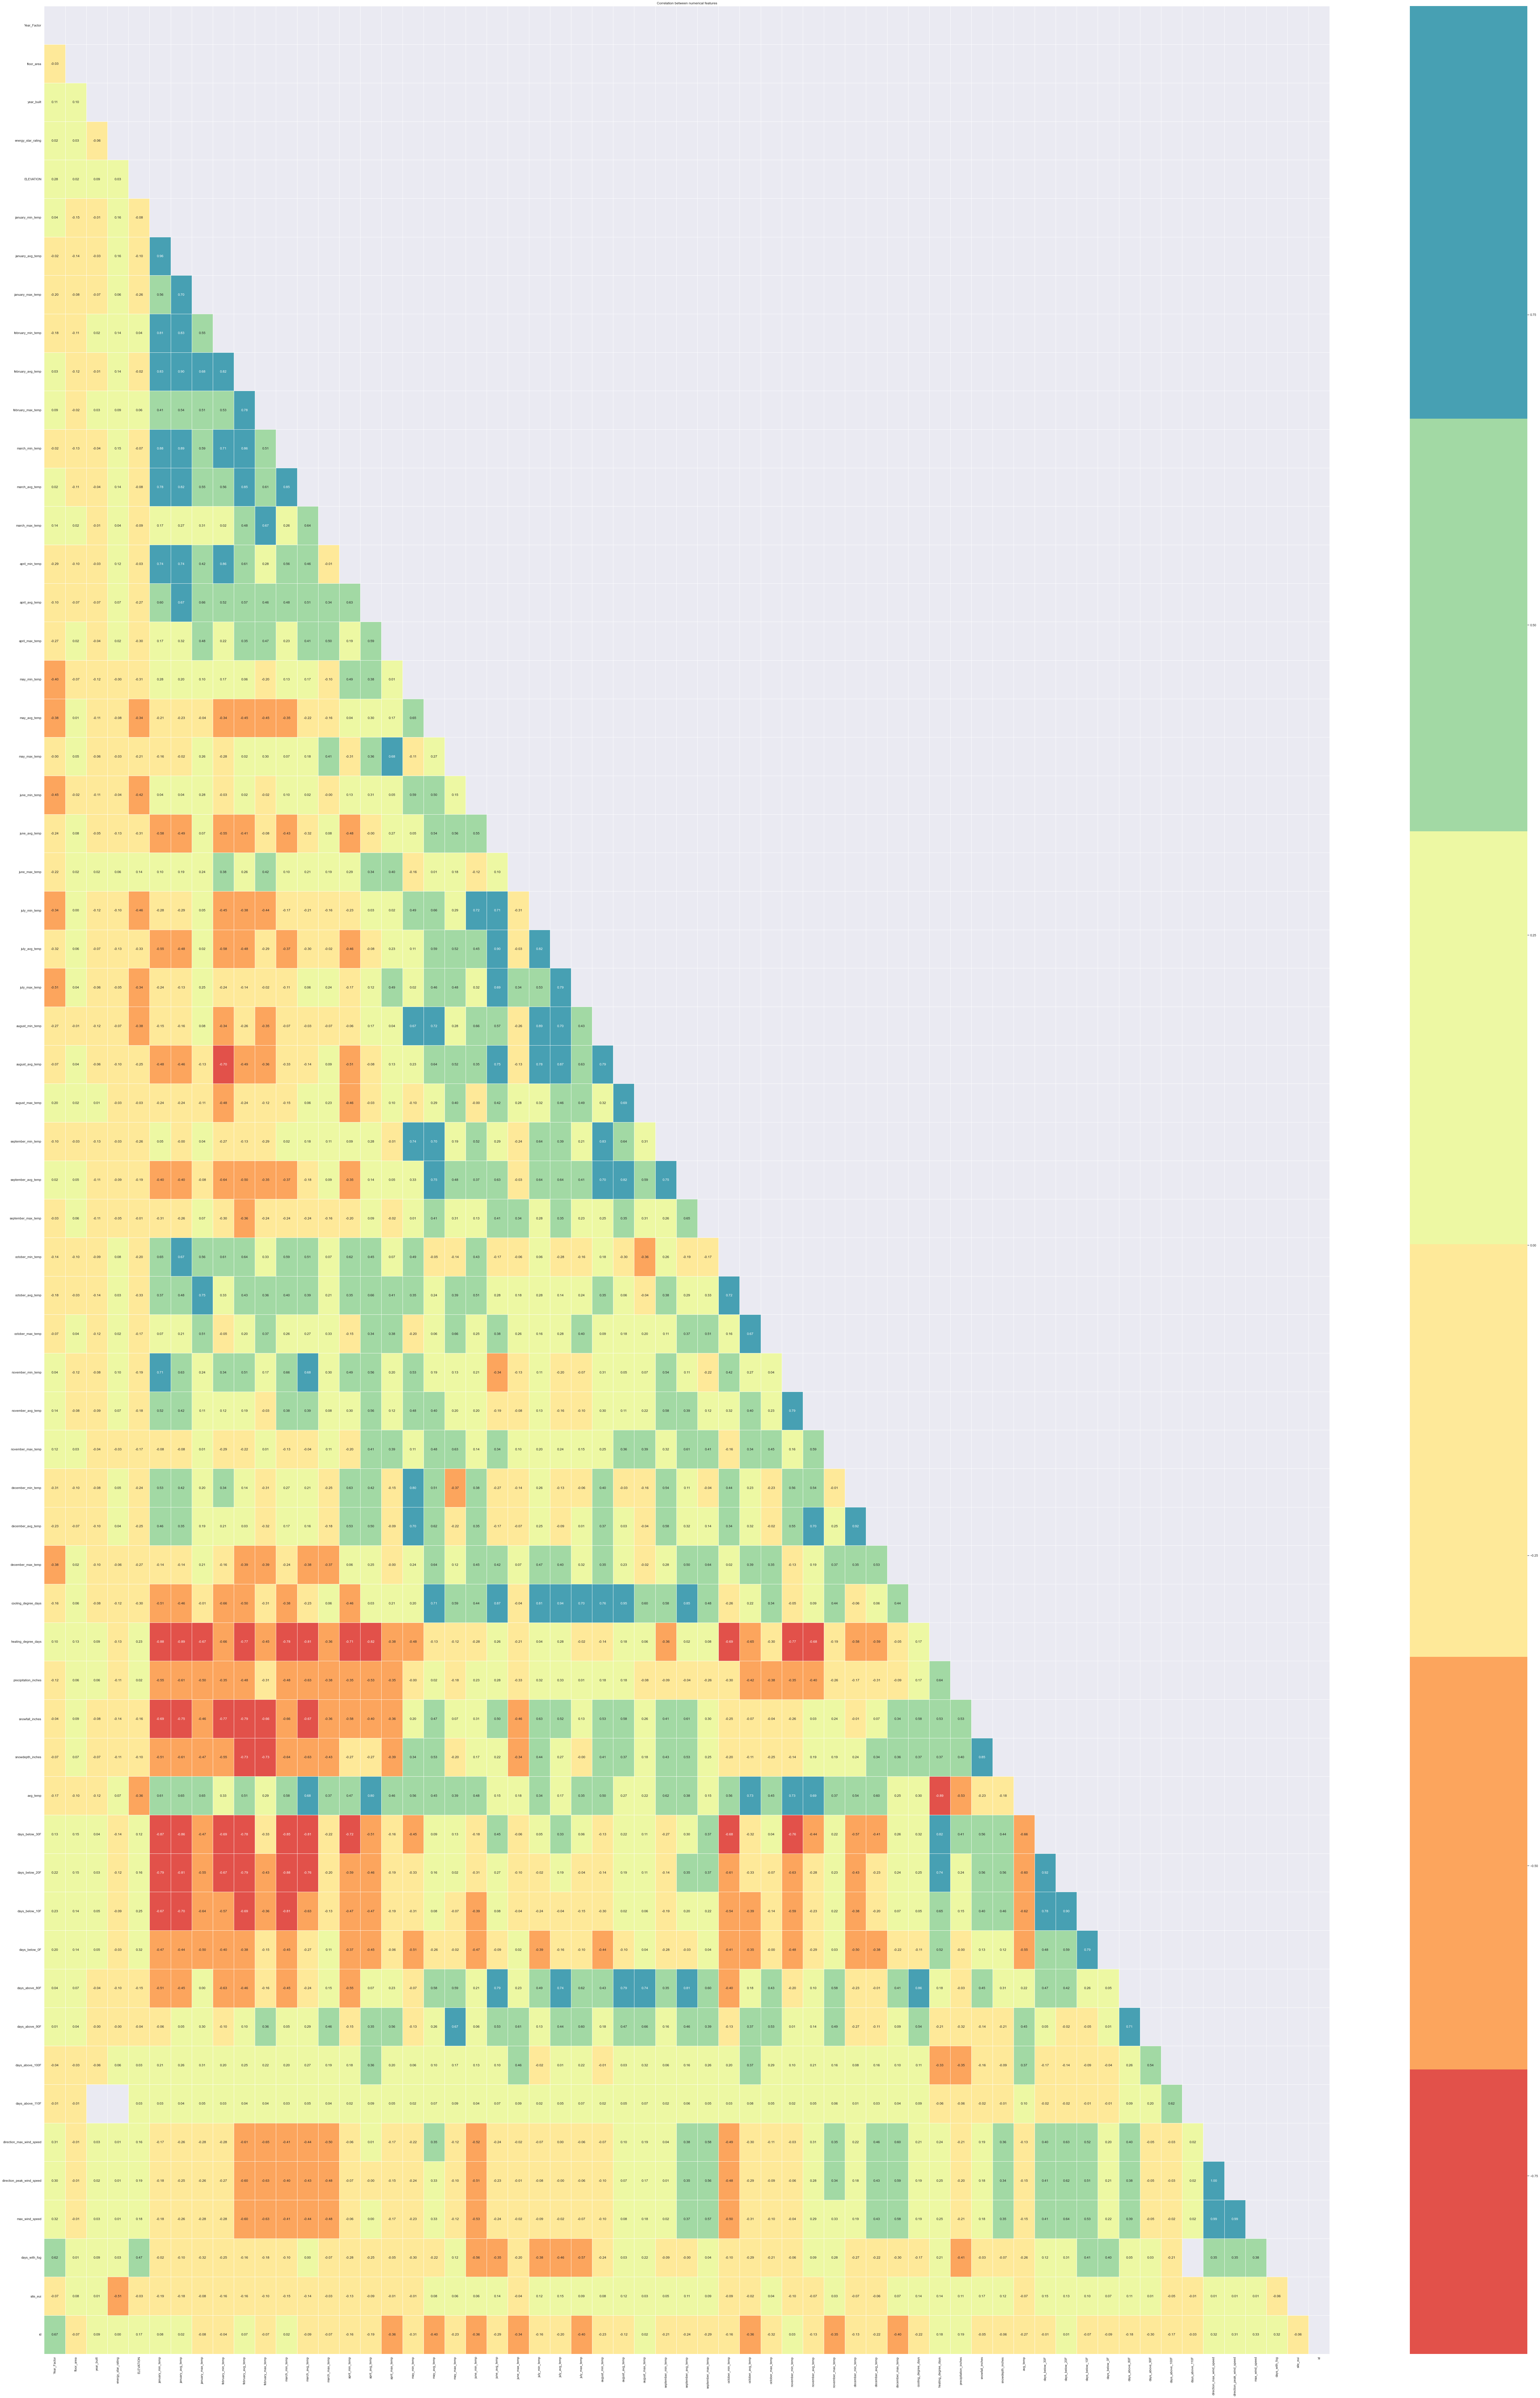

In [42]:
figsize = (100,150)
plot_corr(df_all[num_values], figsize)

In [43]:
# Removing the temperature of each month
num_values_2 = ['Year_Factor',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog',
 'site_eui']

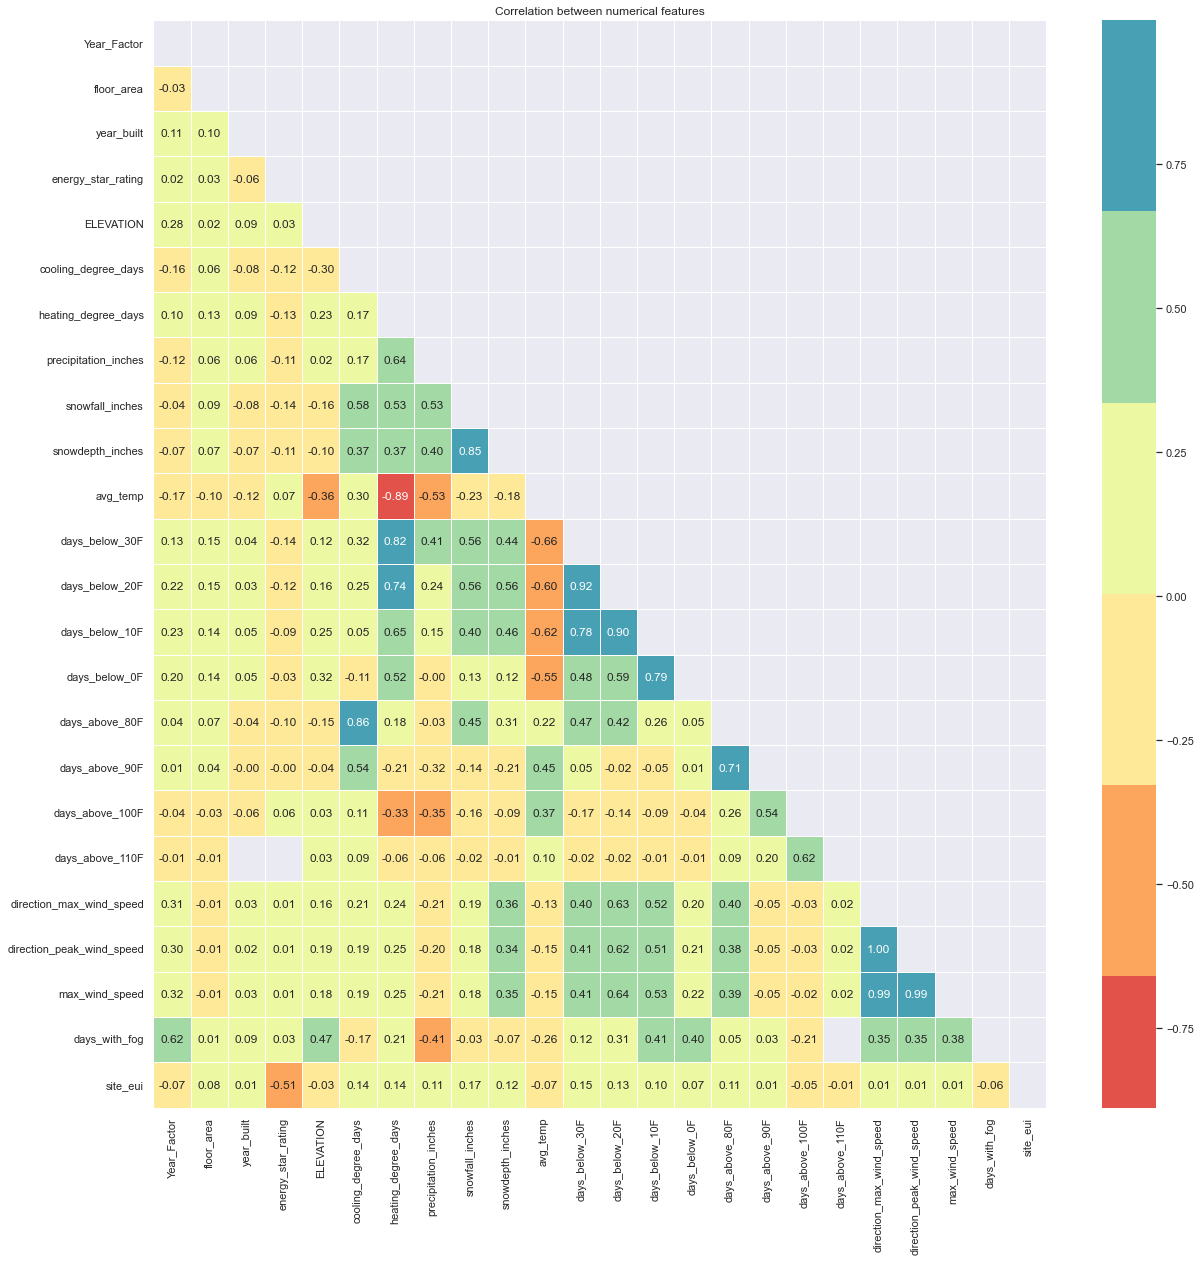

In [44]:
plot_corr(df_all[num_values_2], figsize=(20,20))

* The lower the energy star rating, the higher it will consume energy
* The larger the surface are of a building, the higher it will consume energy.
* The higher the elevation of a building, the higher it will consume energy.
* During high temperature (90 and above), the energy consumption is low, while at low temperature (0 to 80F), the energy consumption is high. 



# Data Preprocessing

Based on the result during EDA, the following are need to perform (data preprocessing):
1. Check then dropped duplicates
2. Evaluation of the missing values (To see whether to impute or drop)
3. Encoding of the object columns
4. Feature Engineering
5. Check for the skewness of the dataset
6. Check for the correlation and multicollinearity

**Check for duplicate values**

In [45]:
print('Duplicate values:', df_all.duplicated().sum())

Duplicate values: 0


**Check and Treat for missing values**

In [46]:
df_all.isnull().sum()[df_all.isnull().sum()!=0] / len(df_all) * 100

year_built                    2.257144
energy_star_rating           33.889916
direction_max_wind_speed     58.104187
direction_peak_wind_speed    58.957197
max_wind_speed               58.104187
days_with_fog                64.254288
dtype: float64

In [47]:
df_all['year_built'].unique()                 

array([1942., 1955., 1951., 1980., 1985., 1956., 1982., 1947., 1929.,
       1979., 1927., 1960., 1924.,   nan, 1949., 1926., 1914., 1973.,
       1900., 1913., 1962., 1989., 1967., 1954., 1986., 1906., 1912.,
       1902., 1920., 1905., 1997., 1909., 2002., 1974., 1907., 1908.,
       1988., 1987., 1923., 1948., 1966., 1975., 1934., 1938., 1983.,
       2003., 1915., 1961., 1911., 1925., 1964., 1953., 1957., 2006.,
       1990., 1991., 1969., 1968., 1910., 1937., 1971., 1965., 1946.,
       1917., 1901., 2000., 2008., 1999., 1981., 2001., 1978., 1898.,
       1928., 1970., 1918., 1930., 1903., 1936., 1921., 1922., 1984.,
       1976., 1952., 1959., 1916., 1963., 1972., 1919., 1931., 1958.,
          0., 1994., 1940., 2010., 2009., 1889., 1939., 1945., 1904.,
       1932., 1941., 1977., 1993., 1992., 1950., 1944., 1935., 1996.,
       1995., 1933., 1943., 2007., 2005., 2004., 1869., 2011., 2012.,
       1864., 1998., 1895., 1896., 1875., 1880., 1888., 1897., 1891.,
       2013., 1887.,

The nan and zero needs to be impute and replace, respectively

In [48]:
df_all['year_built'].replace(0, np.nan, inplace=True)

Null values will be imputated Using KNN Imputer method

In [49]:
columns = ['year_built','energy_star_rating',
       'direction_max_wind_speed',
       'direction_peak_wind_speed',
       'max_wind_speed','days_with_fog']

#train_knn = df_all.copy(deep=True)
knn = KNNImputer(n_neighbors=2, weights="uniform")

for i in columns:
    df_all[i] = knn.fit_transform(df_all[[i]])
    print('---'+i+'---')
    print(df_all[i].unique())

---year_built---
[1942.         1955.         1951.         1980.         1985.
 1956.         1982.         1947.         1929.         1979.
 1927.         1960.         1924.         1953.72633671 1949.
 1926.         1914.         1973.         1900.         1913.
 1962.         1989.         1967.         1954.         1986.
 1906.         1912.         1902.         1920.         1905.
 1997.         1909.         2002.         1974.         1907.
 1908.         1988.         1987.         1923.         1948.
 1966.         1975.         1934.         1938.         1983.
 2003.         1915.         1961.         1911.         1925.
 1964.         1953.         1957.         2006.         1990.
 1991.         1969.         1968.         1910.         1937.
 1971.         1965.         1946.         1917.         1901.
 2000.         2008.         1999.         1981.         2001.
 1978.         1898.         1928.         1970.         1918.
 1930.         1903.         1936.    

**Encoding of the object columns**

In [50]:
col = df_all.dtypes.loc[df_all.dtypes=='object']
col = col.index
col = col[:3]
col

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')

In [51]:
for i in col:
    print(i)
    print("---")
    print(df_all[i].unique())

State_Factor
---
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
building_class
---
['Commercial' 'Residential']
facility_type
---
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Pub

In [52]:
df_all.loc[df_all['facility_type'].str.contains('Public_Safety'), 'facility_type'] = 'Public_Safety'
df_all.loc[df_all['facility_type'].str.contains('Public_Assembly'), 'facility_type'] = 'Public_Assembly'
df_all.loc[df_all['facility_type'].str.contains('Food_'), 'facility_type'] = 'Food_Grocery'
df_all.loc[df_all['facility_type'].str.contains('Grocery_'), 'facility_type'] = 'Food_Grocery'
df_all.loc[df_all['facility_type'].str.contains('Retail_'), 'facility_type'] = 'Retail'
df_all.loc[df_all['facility_type'].str.contains('Health_Care'), 'facility_type'] = 'Health_Care'
df_all.loc[df_all['facility_type'].str.contains('Nursing_Home'), 'facility_type'] = 'Health_Care'
df_all.loc[df_all['facility_type'].str.contains('Warehouse'), 'facility_type'] = 'Warehouse'
df_all.loc[df_all['facility_type'].str.contains('Office'), 'facility_type'] = 'Office'
df_all.loc[df_all['facility_type'].str.contains('Commercial'), 'facility_type'] = 'Commercial'
df_all.loc[df_all['facility_type'].str.contains('Education'), 'facility_type'] = 'Education'
df_all.loc[df_all['facility_type'].str.contains('Service'), 'facility_type'] = 'Services'
df_all.loc[df_all['facility_type'].str.contains('Lodging_'), 'facility_type'] = 'Lodging'
df_all.loc[df_all['facility_type'].str.contains('Mixed_Use_Predominantly_Residential'), 'facility_type'] = 'Mixed_Use'
df_all.loc[df_all['facility_type'].str.contains('Multifamily_Uncategorized'), 'facility_type'] = 'Multifamily'
df_all.loc[df_all['facility_type'].str.contains('Unit_Building'), 'facility_type'] = 'Unit_Building'
df_all['facility_type'].unique()

array(['Food_Grocery', 'Warehouse', 'Retail', 'Education', 'Office',
       'Data_Center', 'Commercial', 'Industrial', 'Laboratory',
       'Public_Assembly', 'Lodging', 'Health_Care', 'Religious_worship',
       'Parking_Garage', 'Services', 'Unit_Building', 'Multifamily',
       'Public_Safety', 'Mixed_Use'], dtype=object)

In [53]:
# Target Encoder will be used since some of the data are not present in both test and train data. This is to avoid data leakage
for i in col:
    enc = TargetEncoder()
    df_all[i+'_enc'] = enc.fit_transform(df_all[i],df_all['site_eui'])
    df_all.drop(columns=i, inplace=True)
df_all.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,dataset,State_Factor_enc,building_class_enc,facility_type_enc
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,1.0,1.000000,1.0,109.94301,248.682615,0,train,62.02231,85.176286,214.494069
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,1.0,70.750627,1.0,12.00000,26.500150,1,train,62.02231,85.176286,36.513607
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,1.0,70.750627,1.0,12.00000,24.693619,2,train,62.02231,85.176286,81.809900
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,1.0,70.750627,1.0,12.00000,48.406926,3,train,62.02231,85.176286,73.652805
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,1.0,1.000000,1.0,109.94301,3.899395,4,train,62.02231,85.176286,36.513607


**Feature Engineering**

In [54]:
# To drop id column
df_all.drop(columns='id',inplace=True)

In [55]:
# Extract and combine all temperature related columns
temp = df_all.loc[:, (df_all.columns.str.endswith('_temp'))].columns.unique()
temp

Index(['january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'avg_temp'],
      dtype='object')

In [56]:
df_all['min_temp'] =df_all[temp].min(axis=1)
df_all['max_temp'] =df_all[temp].max(axis=1)
df_all['avg_temp'] =df_all[temp].mean(axis=1)
df_all.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,dataset,State_Factor_enc,building_class_enc,facility_type_enc,min_temp,max_temp
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,1.000000,1.0,109.94301,248.682615,train,62.02231,85.176286,214.494069,35.0,90.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,70.750627,1.0,12.00000,26.500150,train,62.02231,85.176286,36.513607,35.0,90.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,70.750627,1.0,12.00000,24.693619,train,62.02231,85.176286,81.809900,35.0,90.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,70.750627,1.0,12.00000,48.406926,train,62.02231,85.176286,73.652805,35.0,90.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,1.000000,1.0,109.94301,3.899395,train,62.02231,85.176286,36.513607,35.0,90.0


In [57]:
spring_temp = df_all.loc[:, df_all.columns.str.startswith(('march','april','may'))].columns.unique()
summer_temp = df_all.loc[:, df_all.columns.str.startswith(('june','july','august'))].columns.unique()
fall_temp = df_all.loc[:, df_all.columns.str.startswith(('september','october','november'))].columns.unique()
winter_temp = df_all.loc[:, df_all.columns.str.startswith(('december','january','february'))].columns.unique()

In [58]:
# Spring
df_all['spring_avg_temp'] = df_all[spring_temp].mean(axis=1)
df_all['spring_min_temp'] = df_all[spring_temp].min(axis=1) 
df_all['spring_max_temp'] = df_all[spring_temp].max(axis=1) 
# Summer
df_all['summer_avg_temp'] = df_all[summer_temp].mean(axis=1)
df_all['summer_min_temp'] = df_all[summer_temp].min(axis=1) 
df_all['summer_max_temp'] = df_all[summer_temp].max(axis=1)
# Fall
df_all['fall_avg_temp'] = df_all[fall_temp].mean(axis=1)
df_all['fall_min_temp'] = df_all[fall_temp].min(axis=1) 
df_all['fall_max_temp'] = df_all[fall_temp].max(axis=1)
# Winter
df_all['winter_avg_temp'] = df_all[winter_temp].mean(axis=1)
df_all['winter_min_temp'] = df_all[winter_temp].min(axis=1) 
df_all['winter_max_temp'] = df_all[winter_temp].max(axis=1)

df_all.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,spring_max_temp,summer_avg_temp,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,84.0,66.487455,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0


In [59]:
to_drop = df_all.loc[:, (df_all.columns.str.
                         startswith(('january','february','march','april','may',
                                     'june','july','august','september','october',
                                    'november','december')))].columns.unique()
to_drop

Index(['january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp'],
      dtype='object')

In [60]:
df_all.drop(columns=to_drop,inplace=True)

The columns cooling_degree_days and heating_degree_days are named as 'days' yet they are expressed as annual values. These are need to be corrected to avoid misconception with the columns

In [61]:
df_all['cooling_degree_month'] = df_all['cooling_degree_days'] / 12
df_all['heating_degree_month'] = df_all['heating_degree_days'] / 12

In [62]:
df_all.drop(columns = ['cooling_degree_days','heating_degree_days'], inplace = True)

In [63]:
df_all

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,...,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp,cooling_degree_month,heating_degree_month
0,1,61242.0,1942.0,11.0,2.4,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
1,1,274000.0,1955.0,45.0,1.8,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
2,1,280025.0,1951.0,97.0,1.8,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
3,1,55325.0,1980.0,46.0,1.8,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
4,1,66000.0,1985.0,100.0,2.4,16.59,0.0,0,60.22264,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7,305925.0,2013.0,99.0,812.0,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667
85458,7,34909.0,1910.0,94.0,26.5,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667
85459,7,42393.0,2014.0,94.0,812.0,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667
85460,7,25368.0,1992.0,79.0,812.0,44.83,4.0,10,54.47804,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.750000,373.166667


**Check the skewness of the dataset**

In [64]:
nums = df_all.select_dtypes([np.number]).columns

In [65]:
skew = df_all[nums].skew().sort_values(key=abs, ascending=False)[:5]
skew

days_above_110F    89.873857
days_above_100F    24.615438
floor_area          6.701786
ELEVATION           5.140444
site_eui            4.643585
dtype: float64

The following columns are highly skewed: days_above_110F, days_above_100F. These columns are need to be corrected

In [66]:
skewed = ['days_above_110F', 'days_above_100F']

for var in skewed:
    df_all[var] = np.where(df_all[var]==0, 0, 1)

# Model Development and Evaluation

**Split the dataset**

In [71]:
train = df_all[df_all['dataset']=='train']
test = df_all[df_all['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

target = train['site_eui'] #y_train

train = train.drop(['dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['dataset', 'site_eui'], axis=1) #X_test

In [72]:
train

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,...,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp,cooling_degree_month,heating_degree_month
0,1,61242.0,1942.0,11.00000,2.4,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
1,1,274000.0,1955.0,45.00000,1.8,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
2,1,280025.0,1951.0,97.00000,1.8,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
3,1,55325.0,1980.0,46.00000,1.8,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
4,1,66000.0,1985.0,100.00000,2.4,16.59,0.0,0,60.222640,0,...,50.0,90.0,63.162903,43.0,90.0,52.151498,35.0,73.0,9.583333,246.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,20410.0,1995.0,8.00000,36.6,45.03,1.4,1,56.887026,6,...,47.0,91.0,56.563321,39.0,79.0,42.961809,24.0,64.0,21.666667,314.333333
75753,6,40489.0,1910.0,98.00000,36.6,45.03,1.4,1,56.887026,6,...,47.0,91.0,56.563321,39.0,79.0,42.961809,24.0,64.0,21.666667,314.333333
75754,6,28072.0,1917.0,61.53185,36.6,106.32,36.6,438,50.428834,26,...,41.0,87.0,50.232736,34.0,73.0,36.843283,15.0,58.0,4.583333,518.166667
75755,6,53575.0,2012.0,61.53185,36.6,106.32,36.6,438,50.428834,26,...,41.0,87.0,50.232736,34.0,73.0,36.843283,15.0,58.0,4.583333,518.166667


In [73]:
test

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,...,summer_min_temp,summer_max_temp,fall_avg_temp,fall_min_temp,fall_max_temp,winter_avg_temp,winter_min_temp,winter_max_temp,cooling_degree_month,heating_degree_month
0,7,28484.0,1994.0,37.0,2.4,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
1,7,21906.0,1961.0,55.0,45.7,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
2,7,16138.0,1950.0,1.0,59.1,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
3,7,97422.0,1971.0,34.0,35.4,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
4,7,61242.0,1942.0,35.0,1.8,25.24,0.0,0,62.281685,0,...,51.0,97.0,66.778913,43.0,104.0,52.107335,38.0,66.0,28.50,176.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,305925.0,2013.0,99.0,812.0,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667
9701,7,34909.0,1910.0,94.0,26.5,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667
9702,7,42393.0,2014.0,94.0,812.0,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667
9703,7,25368.0,1992.0,79.0,812.0,44.83,4.0,10,54.478040,17,...,45.0,93.0,55.962306,30.0,90.0,40.646505,21.0,59.0,28.75,373.166667


In [74]:
target

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 75757, dtype: float64

In [75]:
X_train = train
X_test = test
y_train = target
y_test = y_test_df['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 40)
Test: (9705, 40)
Samples:  (75757,)
Targets:  (9705,)


In [89]:
def evaluate_model(model, X_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Display the model's matrix
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred) 

    return {'rmse':rmse, 'mae':mae, 'mse':mse,'r2':r2}

In [90]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)

**Baseline Model**

In [114]:
# Models to be used: LogisticRegression, DecisionTree, RandomForest, NaiveBayes,KNN

#RandomForest
rf = RandomForestRegressor(random_state=1, criterion='mse', max_depth = 15, min_samples_split= 2)
#AdaboostRegressor
ada = AdaBoostRegressor()
#XgBoost Regressor
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
#Gradient Boosting
gb = GradientBoostingRegressor()

#Stacked Model
base_models = [
    ('RandomForest', rf),
    ('AdaBoost',ada),
    ('XGBoost',xgb),
    ('GradBoost',gb),
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = LinearRegression(),
    cv = 5)

model = {'RandomForest': rf, 'AdaBoost': ada, 'XGBoost': xgb, 'GradBoost':gb, 'Stacked':stacked}

In [115]:
for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, y_test)
    # Print result
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  RandomForest
RMSE:
 34.50076488876606
MAE:
 18.472447427787856
MSE:
 1190.3027779099127
R2:
 0.6707939870319779
------------
Model:  AdaBoost
RMSE:
 64.55866852754792
MAE:
 44.72361789712315
MSE:
 4167.821682049806
R2:
 -0.1527083563717737
------------
Model:  XGBoost
RMSE:
 30.966019730735677
MAE:
 19.888711354076975
MSE:
 958.8943779643113
R2:
 0.7347953807338136
------------
Model:  GradBoost
RMSE:
 42.20567683320876
MAE:
 21.61950959730804
MSE:
 1781.319156949255
R2:
 0.5073346140445575
------------
Model:  Stacked
RMSE:
 35.48065036218439
MAE:
 20.086057581678574
MSE:
 1258.8765501235755
R2:
 0.6518283099256226


**Hyperparameter Tuning**

In [ ]:
#Cross Fold Validation

In [ ]:
stacked.fit(X_train, y_train)    
stacked_pred = stacked.predict(X_test)

stacked_r2 = stacked.score(X_test, y_test)
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared = False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Computation Time: {}".format(end_time - start_time))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred) 
print("----------------------------------")